## 3 queries examples

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


##### 1) qual è il film di spiderman con il voto più alto?

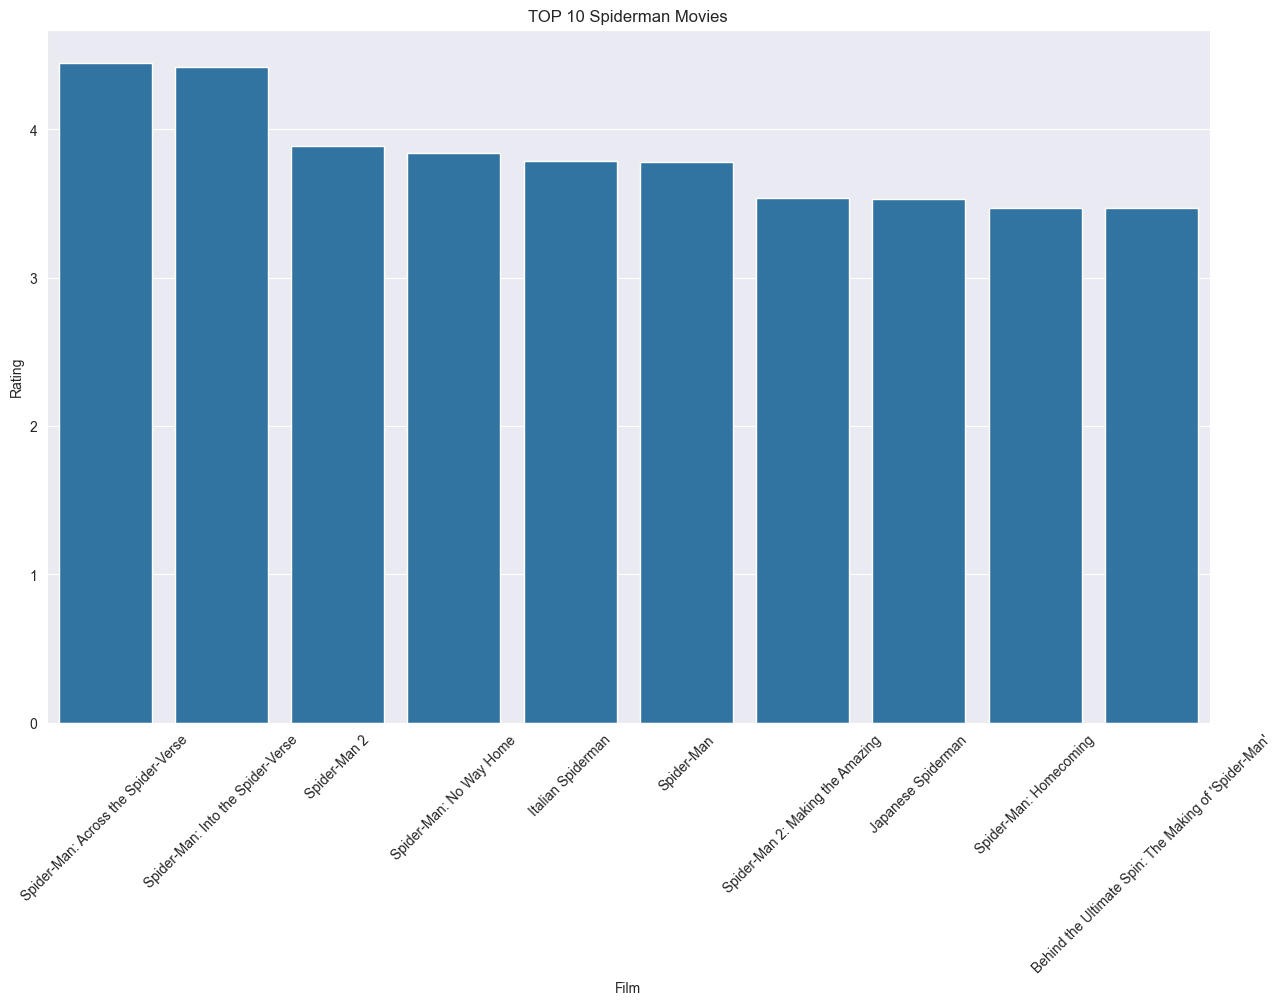

In [16]:
# per questa query utilizziamo il file movies_normalized.csv in quanto contiene i dati necessari per la query

movies_df = pd.read_csv("../File_normalizzati/movies_normalized.csv")

# per prima cosa dobbiamo filtrare i film di spiderman selezionando il titolo che contiene la parola "spiderman" o "uomo ragno"
spiderman_movies = movies_df[movies_df["name"].str.contains("spiderman|uomo ragno|spider-man|spider man", case = False, na = False)]

# ordiniamo i fil di spiderman in base al rating
top_10_spidy = spiderman_movies.sort_values("rating", ascending = False).head(10)

plt.figure(figsize = (15, 9))
ax = sns.barplot(data = top_10_spidy, x = "name", y = "rating")
plt.title("TOP 10 Spiderman Movies")
plt.xlabel("Film")
plt.ylabel("Rating")
plt.xticks(rotation = 45)
plt.show()

##### 2) quante statuette ha vinto l'italia?

In [42]:
# preleviamo il dataset con i dati sui premi
awards_df = pd.read_csv("../File_normalizzati/movies_w_actors_&_oscar.csv")

# filtriamo i film che hanno vinto almeno un premio
winners_df = awards_df[awards_df["winner"] == True]

# selezioniamo i film prodotti in italia
ita_win_df = winners_df[winners_df["country"].str.contains("italy|ita|italia", case = False, na = False)]

# calcoliamo il numero di film unici
tot_oscar_ita = ita_win_df.groupby("id")["film_name"].nunique().sum()

print(f"L'Italia ha vinto {tot_oscar_ita} statuette agli Oscar.")


L'Italia ha vinto 22 statuette agli Oscar.


##### 3) Il giappone ha mai prodotto dei film western?

In [55]:
# preleviamo il dataset con i dati sui generi dei film
genres_df = pd.read_csv("../File_normalizzati/movies_w_genres_&_country.csv")

# come prima cosa filtriamo i film prodotti in giappone
japan_movies = genres_df[genres_df["country"].str.contains("japan|giappone", case = False, na = False)]
is_western_present = japan_movies["genre"].isin(["Western"])

# Per vedere i film giapponesi che sono western
western_japan_movies = japan_movies[is_western_present]

# Per contare quanti film giapponesi sono western
num_western_japan_movies = is_western_present.sum()

print(f"Numero di film giapponesi di genere Western: {num_western_japan_movies}")
print("Esempio di film giapponesi Western:")
western_japan_movies.head()

Numero di film giapponesi di genere Western: 38
Esempio di film giapponesi Western:


,id,name,date,description,minute,rating,country,genre,year_range
5801,1001636,Cowboy Bebop,1998.0,"In 2071, roughly fifty years after an accident...",625.0,4.65,Japan,Western,1990-2000
7265,1002064,Dead Man,1995.0,"On the run after murdering a man, accountant W...",121.0,3.89,Japan,Western,1990-2000
10323,1002998,The Quick and the Dead,1995.0,A mysterious woman comes to compete in a quick...,107.0,3.42,Japan,Western,1990-2000
36484,1011375,Sukiyaki Western Django,2007.0,A nameless gunfighter arrives in a town ripped...,121.0,3.14,Japan,Western,2000-2010
63068,1021893,Unforgiven,2013.0,"An old swordsman, his former comrade and a you...",135.0,3.66,Japan,Western,2010-2020
